# Libraries

In [135]:
import sys
import os
directory_path = os.path.abspath(os.path.join('..'))
utils_path = os.path.abspath(os.path.join('../utils'))
if directory_path not in sys.path:
    sys.path.append(directory_path)
    sys.path.append(utils_path)

In [136]:
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
from utils.Validator import *
from utils.Combinations import *
from utils.Network import *
pd.set_option('display.max_columns', None)
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Data Consolidation

In [137]:
df_net_metrics = pd.read_csv(r"../data/interim/UserNetworksMetrics.csv")
df_net_metrics["UserId"] = df_net_metrics["UserId"].astype(str)
df_net_metrics.head()

,UserId,UserName,DisplayName,PerformanceTier,Flg_Creacion,in_degree_followers,out_degree_followers,in_degree_cent_followers,pagerank_cent_followers,degree_teams,degree_cent_teams,eigenvector_cent_teams,degree_forums,degree_cent_forums,eigenvector_cent_forums
0,368,antgoldbloom,Anthony Goldbloom,2,5Y,983.0,6.0,0.003872,0.001775,4.0,0.000026,9.451808e-26,887.0,0.008758,0.001207
1,381,iguyon,Isabelle,2,5Y,6.0,0.0,0.000024,0.000005,NaN,NaN,NaN,113.0,0.001116,0.000052
2,389,anandjeyahar,Anand Jeyahar,1,5Y,2.0,0.0,0.000008,0.000002,1.0,0.000006,1.171515e-26,59.0,0.000583,0.000033
3,392,jmeynet,Julien Meynet,3,5Y,1.0,0.0,0.000004,0.000002,NaN,NaN,NaN,25.0,0.000247,0.000001
4,394,m4xl1n,m4xl1n,1,5Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
df_user_achi = pd.read_csv(r"../data/interim/UserAchievements.csv")
df_user_achi["UserId"] = df_user_achi["UserId"].astype(str)
df_user_achi.head()

,UserId,TotalGold_Comp,TotalSilver_Comp,TotalBronze_Comp,TotalGold_Scri,TotalSilver_Scri,TotalBronze_Scri,TotalGold_Disc,TotalSilver_Disc,TotalBronze_Disc,TotalGold_Data,TotalSilver_Data,TotalBronze_Data
0,368,0.0,0.0,0.0,0.0,3.0,13.0,14.0,13.0,139.0,1.0,3.0,6.0
1,381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,53.0,0.0,0.0,0.0
2,389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,392,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
4,394,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [139]:
df_user_final = df_net_metrics.merge(df_user_achi,how="left",on=["UserId"])
df_user_final.head()

,UserId,UserName,DisplayName,PerformanceTier,Flg_Creacion,in_degree_followers,out_degree_followers,in_degree_cent_followers,pagerank_cent_followers,degree_teams,degree_cent_teams,eigenvector_cent_teams,degree_forums,degree_cent_forums,eigenvector_cent_forums,TotalGold_Comp,TotalSilver_Comp,TotalBronze_Comp,TotalGold_Scri,TotalSilver_Scri,TotalBronze_Scri,TotalGold_Disc,TotalSilver_Disc,TotalBronze_Disc,TotalGold_Data,TotalSilver_Data,TotalBronze_Data
0,368,antgoldbloom,Anthony Goldbloom,2,5Y,983.0,6.0,0.003872,0.001775,4.0,0.000026,9.451808e-26,887.0,0.008758,0.001207,0.0,0.0,0.0,0.0,3.0,13.0,14.0,13.0,139.0,1.0,3.0,6.0
1,381,iguyon,Isabelle,2,5Y,6.0,0.0,0.000024,0.000005,NaN,NaN,NaN,113.0,0.001116,0.000052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,53.0,0.0,0.0,0.0
2,389,anandjeyahar,Anand Jeyahar,1,5Y,2.0,0.0,0.000008,0.000002,1.0,0.000006,1.171515e-26,59.0,0.000583,0.000033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,392,jmeynet,Julien Meynet,3,5Y,1.0,0.0,0.000004,0.000002,NaN,NaN,NaN,25.0,0.000247,0.000001,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
4,394,m4xl1n,m4xl1n,1,5Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
cols = df_user_final.columns[3:].tolist()
cols.remove('Flg_Creacion')

In [141]:
Validator.validar_categorico(df_user_final,['Flg_Creacion'])

,Variable,n,Missing,%Missing,Unico
0,Flg_Creacion,194147,138,0.07,6


In [142]:
#Eliminamos los 7 registros que no tienen flag creacion
df_user_final = df_user_final[~df_user_final['Flg_Creacion'].isnull()]
Validator.validar_categorico(df_user_final,['Flg_Creacion'])

,Variable,n,Missing,%Missing,Unico
0,Flg_Creacion,194009,0,0.0,6


In [143]:
Validator.validar_numerico(df_user_final,cols)

,Variable,n,Missing,%Missing,Negativo,%Negativo,Unico,Media,Min,Max,IQRMAX,3STD,P50,P75,P90,P95,P99,Outlier IQR,%Outlier IQR,Outlier 3SD,%Outlier 3SD,Outlier P90,%Outlier P90,Outlier P95,%Outlier P95,Outlier P99,%Outlier P99
0,PerformanceTier,194009,0,0.00,0,0.0,4,1.08,1.0,4.00,1.0,2.08,1.0,1.0,1.0,2.0,3.00,13604,7.01,2445,1.26,13604,7.01,2445,1.26,349,0.18
0,in_degree_followers,194009,112278,57.87,0,0.0,542,9.36,0.0,16840.00,5.0,471.95,1.0,2.0,8.0,18.0,103.70,10628,5.48,208,0.11,7478,3.85,3898,2.01,818,0.42
0,out_degree_followers,194009,112278,57.87,0,0.0,248,5.13,0.0,2756.00,8.5,64.98,2.0,4.0,11.0,20.0,54.00,10979,5.66,607,0.31,7958,4.10,3853,1.99,813,0.42
0,in_degree_cent_followers,194009,112278,57.87,0,0.0,542,0.00,0.0,0.07,0.0,0.00,0.0,0.0,0.0,0.0,0.00,12520,6.45,208,0.11,7478,3.85,3898,2.01,818,0.42
0,pagerank_cent_followers,194009,112278,57.87,0,0.0,28166,0.00,0.0,0.04,0.0,0.00,0.0,0.0,0.0,0.0,0.00,9548,4.92,173,0.09,8173,4.21,4087,2.11,818,0.42
0,degree_teams,194009,154903,79.84,0,0.0,70,3.33,1.0,133.00,8.5,16.57,2.0,4.0,6.0,10.0,23.00,2392,1.23,701,0.36,3841,1.98,1634,0.84,361,0.19
0,degree_cent_teams,194009,154903,79.84,0,0.0,70,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,2392,1.23,701,0.36,3841,1.98,1634,0.84,361,0.19
0,eigenvector_cent_teams,194009,154903,79.84,0,0.0,13189,0.00,0.0,0.71,0.0,0.02,0.0,0.0,0.0,0.0,0.00,9669,4.98,7,0.00,3911,2.02,1956,1.01,392,0.20
0,degree_forums,194009,92788,47.83,0,0.0,1618,84.99,2.0,15622.00,200.0,732.48,30.0,86.0,189.0,282.0,920.00,8751,4.51,1497,0.77,10077,5.19,5055,2.61,1012,0.52
0,degree_cent_forums,194009,92788,47.83,0,0.0,1618,0.00,0.0,0.15,0.0,0.01,0.0,0.0,0.0,0.0,0.01,8996,4.64,1497,0.77,10077,5.19,5055,2.61,1012,0.52


# Revision de Outliers

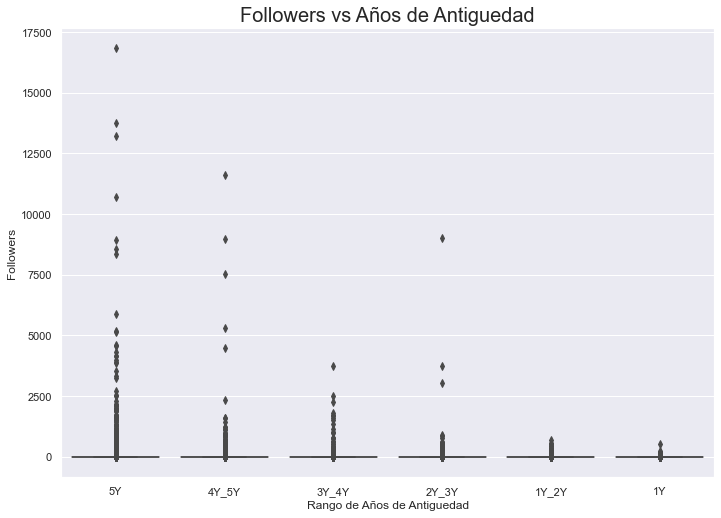

In [160]:
sns.boxplot(data=df_user_final,x="Flg_Creacion",y="in_degree_followers")
plt.title("Followers vs Años de Antiguedad",size=20)
plt.xlabel("Rango de Años de Antiguedad",size=12)
plt.ylabel("Followers",size=12)
plt.show()

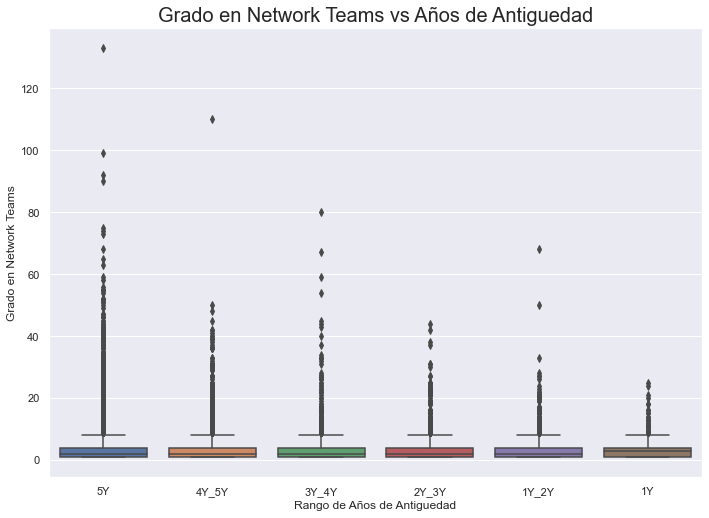

In [159]:
sns.boxplot(data=df_user_final,x="Flg_Creacion",y="degree_teams")
plt.title("Grado en Network Teams vs Años de Antiguedad",size=20)
plt.xlabel("Rango de Años de Antiguedad",size=12)
plt.ylabel("Grado en Network Teams",size=12)
plt.show()

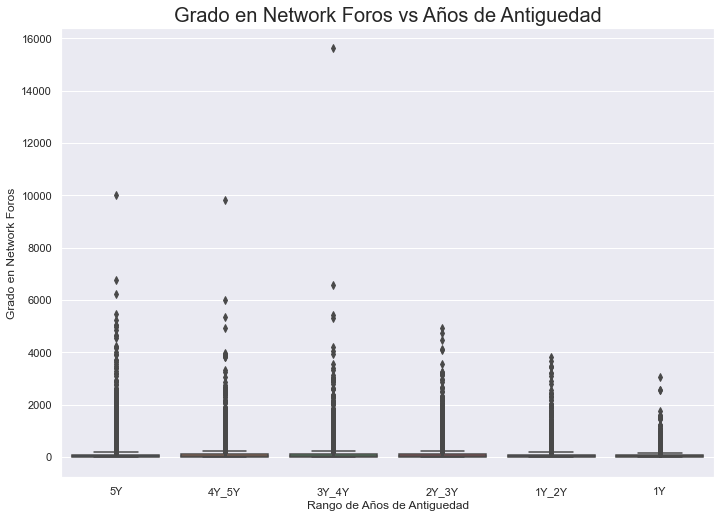

In [161]:
sns.boxplot(data=df_user_final,x="Flg_Creacion",y="degree_forums")
plt.title("Grado en Network Foros vs Años de Antiguedad",size=20)
plt.xlabel("Rango de Años de Antiguedad",size=12)
plt.ylabel("Grado en Network Foros",size=12)
plt.show()

In [150]:
df_user_final[df_user_final["in_degree_followers"]>2500].shape

(33, 27)

In [164]:
df_user_final[df_user_final["degree_teams"]>100]

,UserId,UserName,DisplayName,PerformanceTier,Flg_Creacion,in_degree_followers,out_degree_followers,in_degree_cent_followers,pagerank_cent_followers,degree_teams,degree_cent_teams,eigenvector_cent_teams,degree_forums,degree_cent_forums,eigenvector_cent_forums,TotalGold_Comp,TotalSilver_Comp,TotalBronze_Comp,TotalGold_Scri,TotalSilver_Scri,TotalBronze_Scri,TotalGold_Disc,TotalSilver_Disc,TotalBronze_Disc,TotalGold_Data,TotalSilver_Data,TotalBronze_Data
9593,54836,titericz,Giba,4,5Y,10725.0,31.0,0.042242,0.007934,133.0,0.000854,0.000054,4526.0,0.044687,0.014108,60.0,47.0,31.0,17.0,18.0,28.0,106.0,118.0,514.0,0.0,0.0,2.0
67617,1192776,bolkonsky,YuryBolkonsky,4,4Y_5Y,194.0,1.0,0.000764,0.000098,110.0,0.000706,0.000033,84.0,0.000829,0.000306,8.0,22.0,10.0,0.0,0.0,1.0,5.0,4.0,10.0,0.0,0.0,1.0


In [163]:
df_user_final[df_user_final["degree_forums"]>14000]

,UserId,UserName,DisplayName,PerformanceTier,Flg_Creacion,in_degree_followers,out_degree_followers,in_degree_cent_followers,pagerank_cent_followers,degree_teams,degree_cent_teams,eigenvector_cent_teams,degree_forums,degree_cent_forums,eigenvector_cent_forums,TotalGold_Comp,TotalSilver_Comp,TotalBronze_Comp,TotalGold_Scri,TotalSilver_Scri,TotalBronze_Scri,TotalGold_Disc,TotalSilver_Disc,TotalBronze_Disc,TotalGold_Data,TotalSilver_Data,TotalBronze_Data
103257,3012786,mpwolke,Marília Prata,4,3Y_4Y,2252.0,5.0,0.00887,0.001986,2.0,0.000013,8.020131e-09,15622.0,0.154241,0.38034,0.0,0.0,0.0,12.0,29.0,374.0,53.0,84.0,8420.0,1.0,10.0,93.0


# Tratamiento de nulos y vacios

In [109]:
# Primero crearemos unos flag para saber si un usuario esta o no en la red
df_user_final["Flg_IsIn_Followers_Net"] = np.where(df_user_final["in_degree_followers"].isnull(),0,1)
df_user_final["Flg_IsIn_Teams_Net"] = np.where(df_user_final["degree_teams"].isnull(),0,1)
df_user_final["Flg_IsIn_Forums_Net"] = np.where(df_user_final["degree_forums"].isnull(),0,1)
df_user_final.head()

,UserId,UserName,DisplayName,PerformanceTier,Flg_Creacion,in_degree_followers,out_degree_followers,in_degree_cent_followers,pagerank_cent_followers,degree_teams,degree_cent_teams,eigenvector_cent_teams,degree_forums,degree_cent_forums,eigenvector_cent_forums,TotalGold_Comp,TotalSilver_Comp,TotalBronze_Comp,TotalGold_Scri,TotalSilver_Scri,TotalBronze_Scri,TotalGold_Disc,TotalSilver_Disc,TotalBronze_Disc,TotalGold_Data,TotalSilver_Data,TotalBronze_Data,Flg_IsIn_Followers_Net,Flg_IsIn_Teams_Net,Flg_IsIn_Forums_Net
0,368,antgoldbloom,Anthony Goldbloom,2,5Y,6.0,983.0,0.000024,0.000003,4.0,0.000026,9.451808e-26,887.0,0.008758,0.001207,0.0,0.0,0.0,0.0,3.0,13.0,14.0,13.0,139.0,1.0,3.0,6.0,1,1,1
1,381,iguyon,Isabelle,2,5Y,0.0,6.0,0.000000,0.000003,NaN,NaN,NaN,113.0,0.001116,0.000052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,53.0,0.0,0.0,0.0,1,0,1
2,389,anandjeyahar,Anand Jeyahar,1,5Y,0.0,2.0,0.000000,0.000003,1.0,0.000006,1.171515e-26,59.0,0.000583,0.000033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,1
3,392,jmeynet,Julien Meynet,3,5Y,0.0,1.0,0.000000,0.000003,NaN,NaN,NaN,25.0,0.000247,0.000001,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1,0,1
4,394,m4xl1n,m4xl1n,1,5Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [110]:
#Reemplazaremos valores NA por 0 para los usuarios que no estan en cada una de las reds
df_user_final.fillna(0,inplace=True)
df_user_final.head()

,UserId,UserName,DisplayName,PerformanceTier,Flg_Creacion,in_degree_followers,out_degree_followers,in_degree_cent_followers,pagerank_cent_followers,degree_teams,degree_cent_teams,eigenvector_cent_teams,degree_forums,degree_cent_forums,eigenvector_cent_forums,TotalGold_Comp,TotalSilver_Comp,TotalBronze_Comp,TotalGold_Scri,TotalSilver_Scri,TotalBronze_Scri,TotalGold_Disc,TotalSilver_Disc,TotalBronze_Disc,TotalGold_Data,TotalSilver_Data,TotalBronze_Data,Flg_IsIn_Followers_Net,Flg_IsIn_Teams_Net,Flg_IsIn_Forums_Net
0,368,antgoldbloom,Anthony Goldbloom,2,5Y,6.0,983.0,0.000024,0.000003,4.0,0.000026,9.451808e-26,887.0,0.008758,0.001207,0.0,0.0,0.0,0.0,3.0,13.0,14.0,13.0,139.0,1.0,3.0,6.0,1,1,1
1,381,iguyon,Isabelle,2,5Y,0.0,6.0,0.000000,0.000003,0.0,0.000000,0.000000e+00,113.0,0.001116,0.000052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,53.0,0.0,0.0,0.0,1,0,1
2,389,anandjeyahar,Anand Jeyahar,1,5Y,0.0,2.0,0.000000,0.000003,1.0,0.000006,1.171515e-26,59.0,0.000583,0.000033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,1
3,392,jmeynet,Julien Meynet,3,5Y,0.0,1.0,0.000000,0.000003,0.0,0.000000,0.000000e+00,25.0,0.000247,0.000001,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1,0,1
4,394,m4xl1n,m4xl1n,1,5Y,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [111]:
df_user_final.isna().sum()

UserId                      0
UserName                    0
DisplayName                 0
PerformanceTier             0
Flg_Creacion                0
in_degree_followers         0
out_degree_followers        0
in_degree_cent_followers    0
pagerank_cent_followers     0
degree_teams                0
degree_cent_teams           0
eigenvector_cent_teams      0
degree_forums               0
degree_cent_forums          0
eigenvector_cent_forums     0
TotalGold_Comp              0
TotalSilver_Comp            0
TotalBronze_Comp            0
TotalGold_Scri              0
TotalSilver_Scri            0
TotalBronze_Scri            0
TotalGold_Disc              0
TotalSilver_Disc            0
TotalBronze_Disc            0
TotalGold_Data              0
TotalSilver_Data            0
TotalBronze_Data            0
Flg_IsIn_Followers_Net      0
Flg_IsIn_Teams_Net          0
Flg_IsIn_Forums_Net         0
dtype: int64

# Escalamiento + Dummies

In [112]:
# Seleccionamos las columnas a escalar
df_user_final.columns[3:]

Index(['PerformanceTier', 'Flg_Creacion', 'in_degree_followers',
       'out_degree_followers', 'in_degree_cent_followers',
       'pagerank_cent_followers', 'degree_teams', 'degree_cent_teams',
       'eigenvector_cent_teams', 'degree_forums', 'degree_cent_forums',
       'eigenvector_cent_forums', 'TotalGold_Comp', 'TotalSilver_Comp',
       'TotalBronze_Comp', 'TotalGold_Scri', 'TotalSilver_Scri',
       'TotalBronze_Scri', 'TotalGold_Disc', 'TotalSilver_Disc',
       'TotalBronze_Disc', 'TotalGold_Data', 'TotalSilver_Data',
       'TotalBronze_Data', 'Flg_IsIn_Followers_Net', 'Flg_IsIn_Teams_Net',
       'Flg_IsIn_Forums_Net'],
      dtype='object')

In [113]:
#Lista de variables categoricas
cols_cat = ['Flg_Creacion','Flg_IsIn_Followers_Net','Flg_IsIn_Teams_Net','Flg_IsIn_Forums_Net']

#Lista de variables numericas
cols_num = df_user_final.columns[3:].tolist()
for cat in cols_cat:
    cols_num.remove(cat)

print("# Variables categoricas: ",len(cols_cat))
print("# Variables numericas: ",len(cols_num))


# Variables categoricas:  4
# Variables numericas:  23


In [114]:
#Creamos una copia para no perder los datos
df_user_final_2 = df_user_final.copy()
df_user_final_2.head()

,UserId,UserName,DisplayName,PerformanceTier,Flg_Creacion,in_degree_followers,out_degree_followers,in_degree_cent_followers,pagerank_cent_followers,degree_teams,degree_cent_teams,eigenvector_cent_teams,degree_forums,degree_cent_forums,eigenvector_cent_forums,TotalGold_Comp,TotalSilver_Comp,TotalBronze_Comp,TotalGold_Scri,TotalSilver_Scri,TotalBronze_Scri,TotalGold_Disc,TotalSilver_Disc,TotalBronze_Disc,TotalGold_Data,TotalSilver_Data,TotalBronze_Data,Flg_IsIn_Followers_Net,Flg_IsIn_Teams_Net,Flg_IsIn_Forums_Net
0,368,antgoldbloom,Anthony Goldbloom,2,5Y,6.0,983.0,0.000024,0.000003,4.0,0.000026,9.451808e-26,887.0,0.008758,0.001207,0.0,0.0,0.0,0.0,3.0,13.0,14.0,13.0,139.0,1.0,3.0,6.0,1,1,1
1,381,iguyon,Isabelle,2,5Y,0.0,6.0,0.000000,0.000003,0.0,0.000000,0.000000e+00,113.0,0.001116,0.000052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,53.0,0.0,0.0,0.0,1,0,1
2,389,anandjeyahar,Anand Jeyahar,1,5Y,0.0,2.0,0.000000,0.000003,1.0,0.000006,1.171515e-26,59.0,0.000583,0.000033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,1
3,392,jmeynet,Julien Meynet,3,5Y,0.0,1.0,0.000000,0.000003,0.0,0.000000,0.000000e+00,25.0,0.000247,0.000001,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1,0,1
4,394,m4xl1n,m4xl1n,1,5Y,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [115]:
#Escalamos la data numerica entre 0-1
scaler = MinMaxScaler()
df_user_final_2[cols_num] = scaler.fit_transform(df_user_final_2[cols_num])
df_user_final_2.head()

,UserId,UserName,DisplayName,PerformanceTier,Flg_Creacion,in_degree_followers,out_degree_followers,in_degree_cent_followers,pagerank_cent_followers,degree_teams,degree_cent_teams,eigenvector_cent_teams,degree_forums,degree_cent_forums,eigenvector_cent_forums,TotalGold_Comp,TotalSilver_Comp,TotalBronze_Comp,TotalGold_Scri,TotalSilver_Scri,TotalBronze_Scri,TotalGold_Disc,TotalSilver_Disc,TotalBronze_Disc,TotalGold_Data,TotalSilver_Data,TotalBronze_Data,Flg_IsIn_Followers_Net,Flg_IsIn_Teams_Net,Flg_IsIn_Forums_Net
0,368,antgoldbloom,Anthony Goldbloom,0.333333,5Y,0.002177,0.058373,0.002177,0.001536,0.030075,0.030075,1.340541e-25,0.056779,0.056779,0.003174,0.000000,0.000000,0.0,0.0,0.057692,0.034759,0.03211,0.023214,0.016508,0.090909,0.130435,0.064516,1,1,1
1,381,iguyon,Isabelle,0.333333,5Y,0.000000,0.000356,0.000000,0.001529,0.000000,0.000000,0.000000e+00,0.007233,0.007233,0.000138,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.001786,0.006295,0.000000,0.000000,0.000000,1,0,1
2,389,anandjeyahar,Anand Jeyahar,0.000000,5Y,0.000000,0.000119,0.000000,0.001529,0.007519,0.007519,1.661548e-26,0.003777,0.003777,0.000088,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000119,0.000000,0.000000,0.000000,1,1,1
3,392,jmeynet,Julien Meynet,0.666667,5Y,0.000000,0.000059,0.000000,0.001529,0.000000,0.000000,0.000000e+00,0.001600,0.001600,0.000003,0.016667,0.118644,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000238,0.000000,0.000000,0.000000,1,0,1
4,394,m4xl1n,m4xl1n,0.000000,5Y,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.016667,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0


In [116]:
#Validamos si se escalo correctamente
Validator.validar_numerico(df_user_final_2,cols_num)

,Variable,n,Missing,%Missing,Negativo,%Negativo,Unico,Media,Min,Max,IQRMAX,3STD,P50,P75,P90,P95,P99,Outlier IQR,%Outlier IQR,Outlier 3SD,%Outlier 3SD,Outlier P90,%Outlier P90,Outlier P95,%Outlier P95,Outlier P99,%Outlier P99
0,PerformanceTier,194009,0,0.0,0,0.0,4,0.03,0.0,1.0,0.00,0.36,0.0,0.0,0.00,0.33,0.67,13604,7.01,2445,1.26,13604,7.01,2445,1.26,349,0.18
0,in_degree_followers,194009,0,0.0,0,0.0,248,0.00,0.0,1.0,0.00,0.02,0.0,0.0,0.00,0.00,0.01,30784,15.87,1286,0.66,16648,8.58,8789,4.53,1856,0.96
0,out_degree_followers,194009,0,0.0,0,0.0,542,0.00,0.0,1.0,0.00,0.02,0.0,0.0,0.00,0.00,0.00,20072,10.35,314,0.16,15300,7.89,9263,4.77,1921,0.99
0,in_degree_cent_followers,194009,0,0.0,0,0.0,248,0.00,0.0,1.0,0.00,0.02,0.0,0.0,0.00,0.00,0.01,30784,15.87,1286,0.66,16648,8.58,8789,4.53,1856,0.96
0,pagerank_cent_followers,194009,0,0.0,0,0.0,37263,0.00,0.0,1.0,0.00,0.01,0.0,0.0,0.00,0.00,0.00,3518,1.81,326,0.17,19401,10.00,7711,3.97,1941,1.00
0,degree_teams,194009,0,0.0,0,0.0,71,0.01,0.0,1.0,0.00,0.06,0.0,0.0,0.02,0.03,0.08,39106,20.16,3008,1.55,16726,8.62,6859,3.54,1634,0.84
0,degree_cent_teams,194009,0,0.0,0,0.0,71,0.01,0.0,1.0,0.00,0.06,0.0,0.0,0.02,0.03,0.08,39106,20.16,3008,1.55,25248,13.01,6859,3.54,1634,0.84
0,eigenvector_cent_teams,194009,0,0.0,0,0.0,13166,0.00,0.0,1.0,0.00,0.01,0.0,0.0,0.00,0.00,0.00,39106,20.16,28,0.01,20163,10.39,9701,5.00,1941,1.00
0,degree_forums,194009,0,0.0,0,0.0,1619,0.00,0.0,1.0,0.01,0.03,0.0,0.0,0.01,0.01,0.04,26242,13.53,2281,1.18,19376,9.99,9514,4.90,1941,1.00
0,degree_cent_forums,194009,0,0.0,0,0.0,1619,0.00,0.0,1.0,0.01,0.03,0.0,0.0,0.01,0.01,0.04,26242,13.53,2281,1.18,19376,9.99,9514,4.90,1941,1.00


In [117]:
#Obtenemos los valores dummies para nuestras variables categoricas
df_dummies = pd.get_dummies(df_user_final_2[cols_cat])
df_dummies.head()

,Flg_IsIn_Followers_Net,Flg_IsIn_Teams_Net,Flg_IsIn_Forums_Net,Flg_Creacion_1Y,Flg_Creacion_1Y_2Y,Flg_Creacion_2Y_3Y,Flg_Creacion_3Y_4Y,Flg_Creacion_4Y_5Y,Flg_Creacion_5Y
0,1,1,1,0,0,0,0,0,1
1,1,0,1,0,0,0,0,0,1
2,1,1,1,0,0,0,0,0,1
3,1,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1


In [118]:
#Borramos las columnas categoricas
df_user_final_2.drop(columns=cols_cat,inplace=True)
#Agregamos las nuevas columnas dummies
df_user_final_3 = df_user_final_2.join(df_dummies)
df_user_final_3.head()

,UserId,UserName,DisplayName,PerformanceTier,in_degree_followers,out_degree_followers,in_degree_cent_followers,pagerank_cent_followers,degree_teams,degree_cent_teams,eigenvector_cent_teams,degree_forums,degree_cent_forums,eigenvector_cent_forums,TotalGold_Comp,TotalSilver_Comp,TotalBronze_Comp,TotalGold_Scri,TotalSilver_Scri,TotalBronze_Scri,TotalGold_Disc,TotalSilver_Disc,TotalBronze_Disc,TotalGold_Data,TotalSilver_Data,TotalBronze_Data,Flg_IsIn_Followers_Net,Flg_IsIn_Teams_Net,Flg_IsIn_Forums_Net,Flg_Creacion_1Y,Flg_Creacion_1Y_2Y,Flg_Creacion_2Y_3Y,Flg_Creacion_3Y_4Y,Flg_Creacion_4Y_5Y,Flg_Creacion_5Y
0,368,antgoldbloom,Anthony Goldbloom,0.333333,0.002177,0.058373,0.002177,0.001536,0.030075,0.030075,1.340541e-25,0.056779,0.056779,0.003174,0.000000,0.000000,0.0,0.0,0.057692,0.034759,0.03211,0.023214,0.016508,0.090909,0.130435,0.064516,1,1,1,0,0,0,0,0,1
1,381,iguyon,Isabelle,0.333333,0.000000,0.000356,0.000000,0.001529,0.000000,0.000000,0.000000e+00,0.007233,0.007233,0.000138,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.001786,0.006295,0.000000,0.000000,0.000000,1,0,1,0,0,0,0,0,1
2,389,anandjeyahar,Anand Jeyahar,0.000000,0.000000,0.000119,0.000000,0.001529,0.007519,0.007519,1.661548e-26,0.003777,0.003777,0.000088,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000119,0.000000,0.000000,0.000000,1,1,1,0,0,0,0,0,1
3,392,jmeynet,Julien Meynet,0.666667,0.000000,0.000059,0.000000,0.001529,0.000000,0.000000,0.000000e+00,0.001600,0.001600,0.000003,0.016667,0.118644,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000238,0.000000,0.000000,0.000000,1,0,1,0,0,0,0,0,1
4,394,m4xl1n,m4xl1n,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.016667,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,1


In [119]:
df_user_final.to_csv(r"../data/processed/UserRaw.csv",index=False)
df_user_final_3.to_csv(r"../data/processed/UserProcessed.csv",index=False)